# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv

# apis
from newsapi import NewsApiClient

# sentiment analysis
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# tokenisation
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# word counting and ngrams
from collections import Counter
from nltk import ngrams

# plotting and word clouds
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# named entity recognition
import spacy
from spacy import displacy
# !python -m spacy download en_core_web_sm

In [2]:
# download lexicon
nltk.download('vader_lexicon')

# init sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stuartperry/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
path = Path('/Users/stuartperry/Env_files/API_keys/news_api.env')
load_dotenv(path)
api_key = os.getenv('NEWS_API_KEY')
type(api_key) 

str

In [4]:
# Create a newsapi client
news_api = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_articles = news_api.get_everything(
    q='bitcoin, BTC, btc',
    language='en',
    sort_by='relevancy',
    page_size=100
)

In [6]:
# Fetch the Ethereum news articles
eth_articles = news_api.get_everything(
    q='ethereum, ETH, eth',
    language='en',
    sort_by='relevancy',
    page_size=100
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(btc_articles["articles"])
btc_df.shape

(100, 8)

In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(eth_articles["articles"])
eth_df.shape

(100, 8)

In [9]:
# Describe the Bitcoin Sentiment
# apply polarity scores along the text content 
btc_df['sentiment'] = btc_df['content'].apply(analyzer.polarity_scores)

# unpack dict in rows into df
btc_sentiment = pd.json_normalize(btc_df['sentiment'])

btc_sentiment.describe()

,neg,neu,pos,compound
count,100.000000,100.00000,100.000000,100.000000
mean,0.039920,0.89833,0.061750,0.081996
std,0.053537,0.07319,0.057697,0.364675
min,0.000000,0.61400,0.000000,-0.680800
25%,0.000000,0.86300,0.000000,-0.157050
50%,0.000000,0.91400,0.052500,0.137850
75%,0.067250,0.95000,0.083500,0.307000
max,0.217000,1.00000,0.285000,0.868200


In [10]:
# Describe the Ethereum Sentiment
# apply polarity scores function along the content column 
eth_df['sentiment'] = eth_df['content'].apply(analyzer.polarity_scores)

# unpack dict in rows into df
eth_sentiment = pd.json_normalize(eth_df['sentiment'])

eth_sentiment.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.032580,0.881250,0.086190,0.208627
std,0.046563,0.082281,0.078291,0.412814
min,0.000000,0.635000,0.000000,-0.784500
25%,0.000000,0.832000,0.000000,0.000000
50%,0.000000,0.887500,0.073000,0.249850
75%,0.058000,0.936000,0.133250,0.514625
max,0.231000,1.000000,0.332000,0.899400


### Questions:

Results from 2022-05-11, using the top 100 most relevant articles 

Q: Which coin had the highest mean positive score?

A: Ethereum has a mean positive score of 0.086 which is slightly higher than bitcoin's mean positive score of 0.062

Q: Which coin had the highest compound score?

A: Ethereum had the nhighest maximum compounds score 0.899, compared to bitcoin's 0.868

Q. Which coin had the highest positive score?

A: Ethereum also ends up on top with a maximum positive score of 0.332, when compared to bitcoin's 0.285

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # only keep alphabetical characters
    regex = re.compile("[^a-zA-Z ]")
    no_punct = regex.sub('', text)
   
    # Create a tokenized list of the words
    tokens = word_tokenize(no_punct)

    # Lemmatize words into root words, apply lower and filter by stopwords
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in sw]

    return tokens

In [23]:
# apply tokenizer along content column, create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['content'].apply(tokenizer)

# combine all tokens into a list
all_btc_tokens = btc_df['tokens'].sum()
len(all_btc_tokens)

1909

In [22]:
# apply tokenizer along content column, create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['content'].apply(tokenizer)

# combine all tokens into a list
all_eth_tokens = eth_df['tokens'].sum()
len(all_eth_tokens)

1988

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [25]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = Counter(ngrams(all_btc_tokens, n=2))
print(dict(btc_bigrams.most_common(10)))

{('bitcoin', 'btc'): 32, ('char', 'bitcoin'): 28, ('char', 'leader'): 9, ('leader', 'news'): 9, ('news', 'information'): 9, ('information', 'cryptocurrency'): 9, ('cryptocurrency', 'digital'): 9, ('digital', 'asset'): 9, ('asset', 'future'): 9, ('future', 'money'): 9}


In [26]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = Counter(ngrams(all_eth_tokens, n=2))
print(dict(eth_bigrams.most_common(10)))

{('ethereum', 'eth'): 10, ('north', 'korean'): 6, ('bored', 'ape'): 6, ('ape', 'yacht'): 6, ('yacht', 'club'): 6, ('char', 'u'): 6, ('char', 'dont'): 6, ('treasury', 'department'): 5, ('nonfungible', 'token'): 5, ('u', 'treasury'): 4}


In [28]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_ten = token_count(all_btc_tokens, N=10)
btc_top_ten

[('char', 100),
 ('bitcoin', 62),
 ('btc', 47),
 ('cryptocurrency', 35),
 ('price', 24),
 ('market', 16),
 ('week', 15),
 ('crypto', 14),
 ('past', 14),
 ('cryptocurrencies', 13)]

In [30]:
# Use token_count to get the top 10 words for Ethereum
eth_top_ten = token_count(all_eth_tokens, N=10)
eth_top_ten

[('char', 100),
 ('ethereum', 31),
 ('crypto', 26),
 ('cryptocurrency', 24),
 ('eth', 21),
 ('cryptocurrencies', 18),
 ('u', 16),
 ('market', 16),
 ('blockchain', 14),
 ('year', 14)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

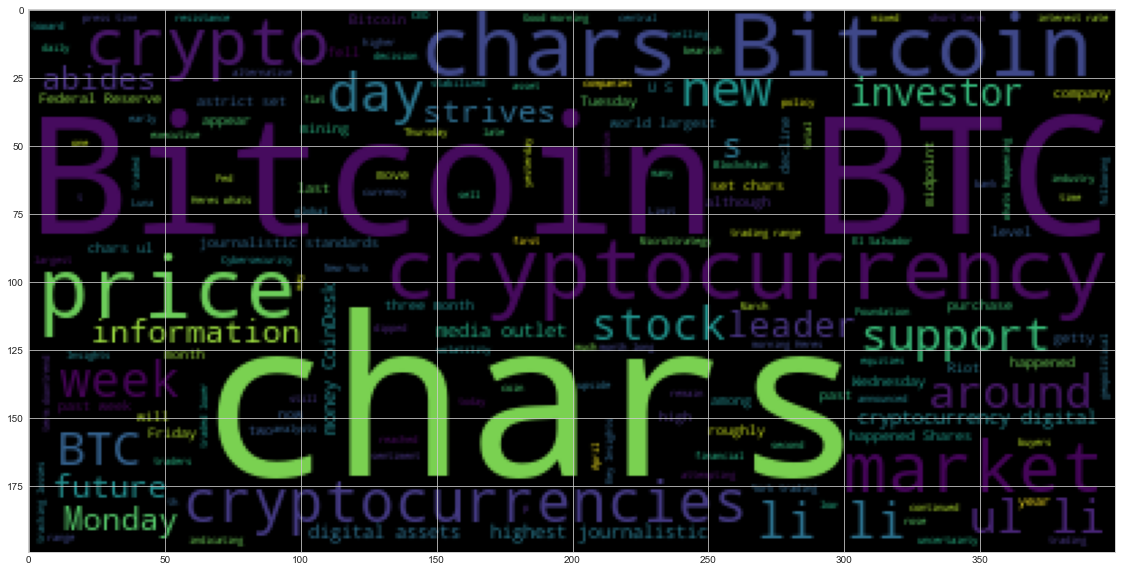

In [35]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_df['content'].sum())
plt.imshow(wc)

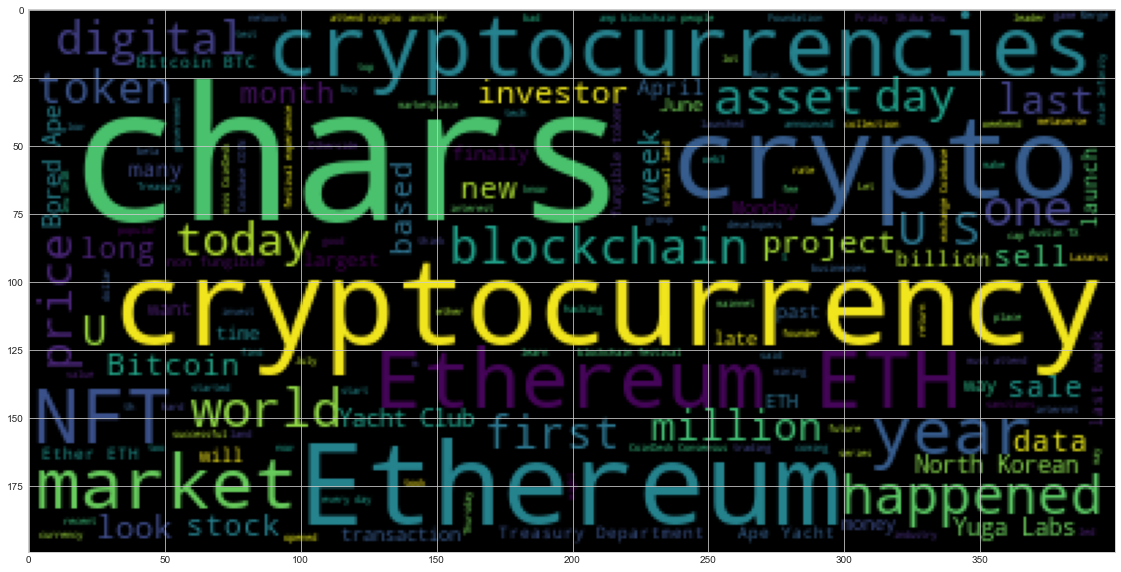

In [36]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(eth_df['content'].sum())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [39]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [41]:
# Concatenate all of the Bitcoin text together
btc_text = btc_df['content'].sum()

In [47]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "BTC articles, named entities"

In [ ]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [46]:
# List all Entities
btc_doc.ents

(Odeniran, last July, 33,000, the week, last week)

---

### Ethereum NER

In [49]:
# Concatenate all of the Ethereum text together
eth_text = eth_df['content'].sum()

In [50]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "ETH articles, named entities"

In [51]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [52]:
# List all Entities
eth_doc.ents

(The US Department of Treasury,
 Lazarus,
 The US Treasury Department,
 North Korean,
 Lazarus,
 $625 million,
 Ronin,
 last July,
 33,000,
 the week,
 last week,
 Fed,
 Ethereum,
 Yuga Labs,
 Bored Ape Yacht Club,
 Yuga Labs,
 Otherside,
 April 30,
 NFT,
 NFT,
 Ethereum,
 Last week,
 U.S. Treasury Department,
 Ethereum,
 Axie Infinity,
 North Korean,
 Thursday,
 first,
 a year and a half ago,
 The Order Flow,
 Dan Robinson,
 Georgios Konstantopoulos',
 Ethereum,
 Dark Forest,
 August 20,
 Saturday,
 Yuga Labs―the,
 the Bored Apes Yacht Club NFT,
 Otherdeeds,
 Dive,
 daily,
 Bored Ape Yacht Club,
 Yuga Labs,
 thousands of dollars,
 Ethereum,
 blockchai,
 chars]The U.S. Department of Justice,
 two,
 European,
 North Korean,
 2019,
 One,
 30,
 one,
 Otherside,
 NFT,
 X2Y2,
 $1.5 million,
 #59906’,
 eighth,
 Yuga Labs Otherside,
 Transform,
 July 19,
 July 20 - 28,
 today,
 U.S. Securities and Exchange Commission,
 SEC,
 Nvidia,
 $5.5 million,
 GPU,
 2018,
 U.S. Treasury Department,
 Nort

---